# Build and Deploy Life Expectancy Model Using Random Forest Regressor

##### Task in the development:
    1) Import packages
    2) Importing data (Dataset: Life Expectancy.csv)
    3) Reviewing the data
    4) Data preparation
    5) Train and Test of Data 
    6) Create Model
    7) Output
    8) Deplyment of Model
    

In [18]:
from botocore.client import Config
import ibm_boto3
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn
import seaborn as sns
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c794f715d7c74bce82d4c3bd9cf92a6d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='BmxCFXCs_7cmkf3lkSMKWtdBumU6CEOcefcH3gJvhPfv',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_c794f715d7c74bce82d4c3bd9cf92a6d.get_object(Bucket='machinelearning-donotdelete-pr-ey88ud2o4lo184',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
life_pre = pd.read_csv(body)
life_pre.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [19]:
from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from scipy import stats

In [20]:
print (life_pre.shape)

(2938, 22)


###### Creating  Dataframe in Pandas

In [21]:
life_pre.dataframeName = 'Life Expectancy Data.csv'

In [22]:
life_pre.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Reviewing Dataset

In [23]:
life_pre.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [24]:
status = pd.get_dummies(life_pre.Status)
life_pre = pd.concat([life_pre, status], axis = 1)
life_pre = life_pre.drop(['Status'], axis=1)
life_pre.rename(columns = {'Deloping' : '0', 'Developed' : 1})

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,1,Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,Afghanistan,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,Afghanistan,2009,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,Afghanistan,2008,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,Afghanistan,2007,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,Afghanistan,2006,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [25]:
life_pre = life_pre.groupby('Country').mean()
life_pre.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,2007.5,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


In [26]:
life_pre.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

###### Data preparation

Text(0, 0.5, 'Life expectancy')

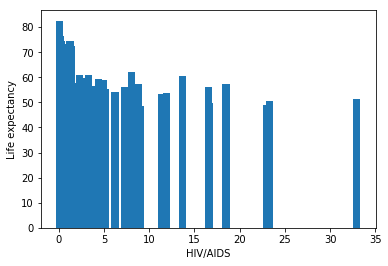

In [27]:
plt.bar(life_pre[' HIV/AIDS'], life_pre['Life expectancy '])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

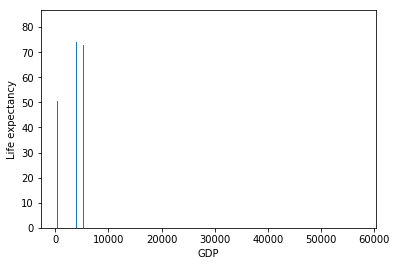

In [28]:
plt.bar(life_pre.GDP, life_pre['Life expectancy '])
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

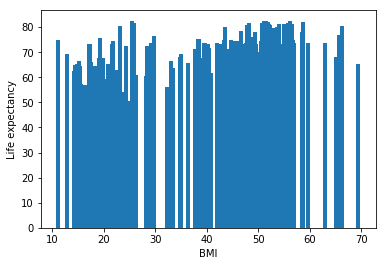

In [29]:
plt.bar(life_pre[' BMI '], life_pre['Life expectancy '])
plt.xlabel('BMI')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

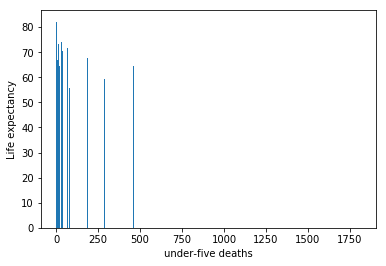

In [30]:
plt.bar(life_pre['under-five deaths '], life_pre['Life expectancy '])
plt.xlabel('under-five deaths')
plt.ylabel('Life expectancy')


Text(0, 0.5, 'Life expectancy')

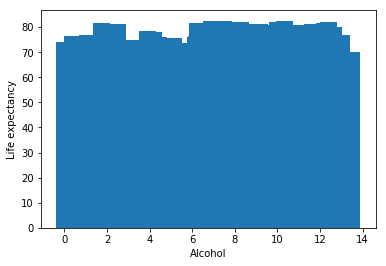

In [31]:
plt.bar(life_pre['Alcohol'], life_pre['Life expectancy '])
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

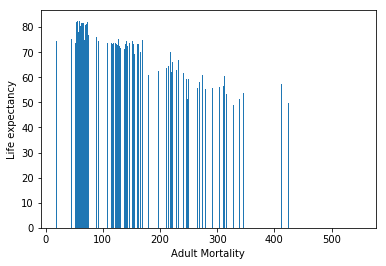

In [32]:
plt.bar(life_pre['Adult Mortality'], life_pre['Life expectancy '])
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

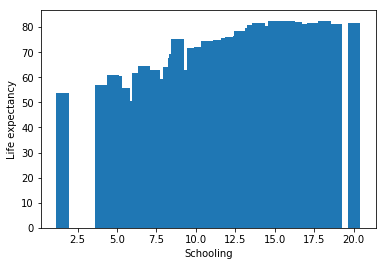

In [33]:
plt.bar(life_pre['Schooling'], life_pre['Life expectancy '])
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

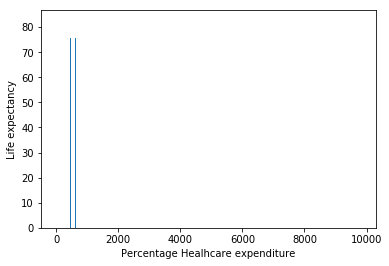

In [34]:
plt.bar(life_pre['percentage expenditure'], life_pre['Life expectancy '])
plt.xlabel('Percentage Healhcare expenditure')
plt.ylabel('Life expectancy')

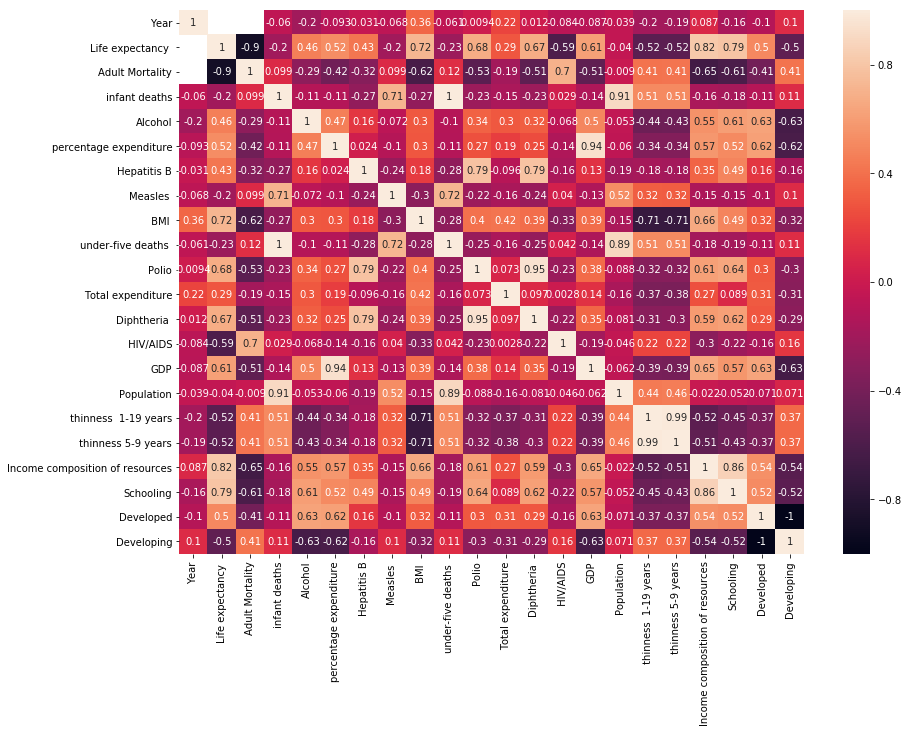

In [35]:
plt.figure(figsize = (14, 10))
sns.heatmap(life_pre.corr(), annot = True)

In [36]:
x = life_pre['Life expectancy ']         #l
y = life_pre.drop('Life expectancy ', axis = 1)    #f

In [37]:
y.isnull().head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [38]:
y.isnull().sum()

Year                                0
Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
Developing                          0
dtype: int64

In [39]:
x.isnull().sum()

10

In [40]:
y.fillna(value = y.mean(), inplace = True)

In [41]:
x.fillna(value = x.mean(), inplace = True)

In [42]:
stats.describe(y[1:])

DescribeResult(nobs=192, minmax=(array([2.00750000e+03, 1.87500000e+01, 0.00000000e+00, 1.00000000e-02,
       0.00000000e+00, 8.00000000e+00, 0.00000000e+00, 5.20000000e+00,
       0.00000000e+00, 9.00000000e+00, 1.64666667e+00, 9.00000000e+00,
       1.00000000e-01, 1.36183210e+02, 2.92000000e+02, 1.00000000e-01,
       1.00000000e-01, 1.31687500e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00]), array([2.01300000e+03, 5.50062500e+02, 1.36668750e+03, 1.34973333e+01,
       9.80181038e+03, 9.90000000e+01, 6.58579375e+04, 8.73000000e+01,
       1.81250000e+03, 9.90000000e+01, 1.72400000e+01, 9.90000000e+01,
       3.29437500e+01, 5.73628746e+04, 4.21467691e+08, 2.71000000e+01,
       2.79437500e+01, 9.31437500e-01, 2.00375000e+01, 1.00000000e+00,
       1.00000000e+00])), mean=array([2.00778646e+03, 1.64253396e+02, 2.85745443e+01, 4.46296480e+00,
       7.12321318e+02, 7.85909681e+01, 2.30174674e+03, 3.96797168e+01,
       3.96419271e+01, 8.26078218e+01, 6.01668050e+00, 8.23

In [43]:
min_max_scaler = MinMaxScaler()
y = min_max_scaler.fit_transform(y)

In [44]:
y

array([[0.00000000e+00, 4.71121045e-01, 5.72552248e-02, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 4.95235855e-02, 5.03041112e-04, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.68333137e-01, 1.48625783e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 3.63369015e-01, 2.88105364e-02, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 6.31572756e-01, 2.44660905e-02, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 8.34960593e-01, 1.94356793e-02, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

##### Training and Testing Data using Random Forest Regressor

In [45]:
y_train, y_test, x_train, x_test = train_test_split(
        y, x, train_size = 0.7, test_size = 0.3)

In [46]:
rf = RandomForestRegressor()
rf_fit = rf.fit(y_train, x_train)

In [47]:
rf_score = cross_val_score(rf_fit, y_train, x_train, cv = 5)

In [48]:
print("mean cross validation score: %.2f"
       % np.mean(rf_score))
print("score without cv: %.2f"
      % rf_fit.score(y_train, x_train))
print("Root mean square on the test data %.2f"
      %r2_score(x_test, rf_fit.predict(y_test)))

mean cross validation score: 0.89
score without cv: 0.98
Root mean square on the test data 0.91


In [49]:
rf_predict = rf.predict(y_test)

In [50]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(RandomForestRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

In [51]:
grid_cv.fit(y_train, x_train)
grid_cv.best_params_

{'min_samples_split': 4}

In [52]:
result = grid_cv.cv_results_
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("Root mean square on training data: %.2f"  % grid_cv.best_estimator_.score(y_train, x_train))

Best Parameters: {'min_samples_split': 4}
Root mean square on training data: 0.98


#### Finding Absolute Error

In [53]:
print("Root mean square: %.2f"
      % r2_score(x_test, grid_cv.best_estimator_.predict(y_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(x_test, rf_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(x_test, rf_predict))

Root mean square: 0.90
Mean squared error: 7.10
Mean absolute error: 1.79
